In [36]:
import pandas as pd

columns = [f"Muscle.{i//8+1}-Sensor.{i%8+1}" for i in range(0, 64)]
columns.append("Class")
data = pd.DataFrame(columns=columns)
data = data.dropna(how="all", axis=1)
data = data.dropna(how="all", axis=0)
for i in range(4):
    archive = pd.read_csv(f"../0-Data/{i}.csv", names=columns)
    archive["Class"] = i
    data = pd.concat([data, archive], axis=0, ignore_index=True)
pd.set_option("display.max_columns", len(data.columns))
print(data.shape[1])
data.head()

65


,Muscle.1-Sensor.1,Muscle.1-Sensor.2,Muscle.1-Sensor.3,Muscle.1-Sensor.4,Muscle.1-Sensor.5,Muscle.1-Sensor.6,Muscle.1-Sensor.7,Muscle.1-Sensor.8,Muscle.2-Sensor.1,Muscle.2-Sensor.2,Muscle.2-Sensor.3,Muscle.2-Sensor.4,Muscle.2-Sensor.5,Muscle.2-Sensor.6,Muscle.2-Sensor.7,Muscle.2-Sensor.8,Muscle.3-Sensor.1,Muscle.3-Sensor.2,Muscle.3-Sensor.3,Muscle.3-Sensor.4,Muscle.3-Sensor.5,Muscle.3-Sensor.6,Muscle.3-Sensor.7,Muscle.3-Sensor.8,Muscle.4-Sensor.1,Muscle.4-Sensor.2,Muscle.4-Sensor.3,Muscle.4-Sensor.4,Muscle.4-Sensor.5,Muscle.4-Sensor.6,Muscle.4-Sensor.7,Muscle.4-Sensor.8,Muscle.5-Sensor.1,Muscle.5-Sensor.2,Muscle.5-Sensor.3,Muscle.5-Sensor.4,Muscle.5-Sensor.5,Muscle.5-Sensor.6,Muscle.5-Sensor.7,Muscle.5-Sensor.8,Muscle.6-Sensor.1,Muscle.6-Sensor.2,Muscle.6-Sensor.3,Muscle.6-Sensor.4,Muscle.6-Sensor.5,Muscle.6-Sensor.6,Muscle.6-Sensor.7,Muscle.6-Sensor.8,Muscle.7-Sensor.1,Muscle.7-Sensor.2,Muscle.7-Sensor.3,Muscle.7-Sensor.4,Muscle.7-Sensor.5,Muscle.7-Sensor.6,Muscle.7-Sensor.7,Muscle.7-Sensor.8,Muscle.8-Sensor.1,Muscle.8-Sensor.2,Muscle.8-Sensor.3,Muscle.8-Sensor.4,Muscle.8-Sensor.5,Muscle.8-Sensor.6,Muscle.8-Sensor.7,Muscle.8-Sensor.8,Class
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [37]:
data.isna().sum() / len(data) * 100

Muscle.1-Sensor.1    0.0
Muscle.1-Sensor.2    0.0
Muscle.1-Sensor.3    0.0
Muscle.1-Sensor.4    0.0
Muscle.1-Sensor.5    0.0
                    ... 
Muscle.8-Sensor.5    0.0
Muscle.8-Sensor.6    0.0
Muscle.8-Sensor.7    0.0
Muscle.8-Sensor.8    0.0
Class                0.0
Length: 65, dtype: float64

In [38]:
data.dtypes

Muscle.1-Sensor.1    float64
Muscle.1-Sensor.2    float64
Muscle.1-Sensor.3    float64
Muscle.1-Sensor.4    float64
Muscle.1-Sensor.5    float64
                      ...   
Muscle.8-Sensor.5    float64
Muscle.8-Sensor.6    float64
Muscle.8-Sensor.7    float64
Muscle.8-Sensor.8    float64
Class                  int64
Length: 65, dtype: object

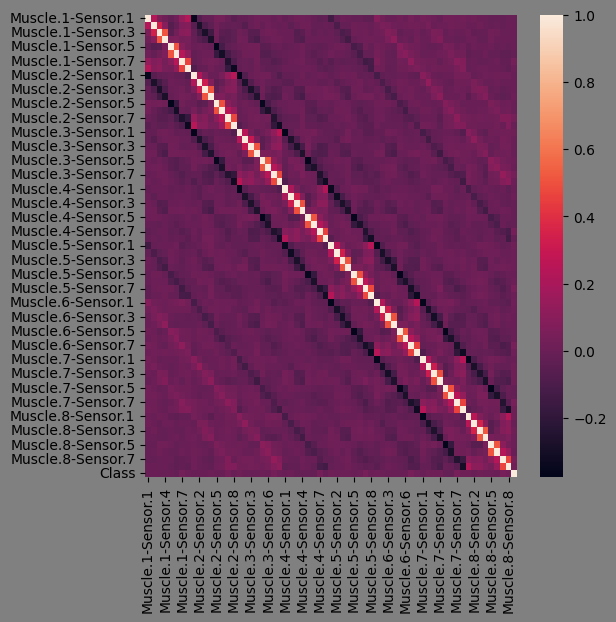

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6)).set_facecolor("gray")
sns.heatmap(data.corr(method="pearson", numeric_only=True))
plt.show()

In [40]:
x = data.drop("Class", axis=1)
y = data["Class"]

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


normalizer = MinMaxScaler(feature_range=(0, 1))
x_norm = normalizer.fit_transform(x)

skfold = StratifiedKFold(n_splits=5, shuffle=True)

algorithms = {
    "LG": (
        LogisticRegression(),
        {
            "C": np.array([0.01, 0.1, 0.5, 1, 3, 5, 10, 20, 50, 100, 500, 1000]),
            "penalty": ["l1", "l2", "elasticnet"],
            "solver": [
                "lbfgs",
                "liblinear",
                "newton-cg",
                "newton-cholesky",
                "sag",
                "saga",
            ],
        },
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbours": np.array([2, 3, 5, 7, 9, 15, 30, 50, 75, 100, 200]),
            "weights": ["uniform", "distance"],
            "metric": ["minkowski", "chebyshev"],
            "p": np.array([2, 3, 6, 9, 15, 30, 50]),
        },
    ),
    "GNB": (GaussianNB(), {}),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            "min_samples_split": np.array([2, 4, 5, 6, 8, 12, 18, 30, 50, 80]),
            "max_depth": np.array([3, 5, 6, 8, 12, 18, 30, 50, 100]),
            "min_samples_leaf": np.array([1, 2, 4, 6, 10, 15, 25]),
            "criterion": ["gini", "entropy", "log_loss"],
        },
    ),
    "RF": (
        RandomForestClassifier(),
        {
            "min_samples_split": np.array([2, 4, 5, 6, 8, 12, 18, 30, 50, 80]),
            "max_depth": np.array([3, 5, 6, 8, 12, 18, 30, 50, 100]),
            "min_samples_leaf": np.array([1, 2, 4, 6, 10, 15, 25]),
            "criterion": ["gini", "entropy", "log_loss"],
        },
    ),
    "ET": (
        ExtraTreesClassifier(),
        {
            "min_samples_split": np.array([2, 4, 5, 6, 8, 12, 18, 30, 50, 80]),
            "max_depth": np.array([3, 5, 6, 8, 12, 18, 30, 50, 100]),
            "min_samples_leaf": np.array([1, 2, 4, 6, 10, 15, 25]),
            "criterion": ["gini", "entropy", "log_loss"],
        },
    ),
    "AB": (
        AdaBoostClassifier(),
        {
            "n_estimators": [100, 200, 300],
            "learning_rate": np.array([2, 1, 0.8, 0.3, 0.15, 0.1, 0.05, 0.005]),
            "algorithm": ["SAMME"],
        },
    ),
    "GB": (
        GradientBoostingClassifier(),
        {
            "loss": ["log_loss", "exponential"],
            "learning_rate": np.array([2, 1, 0.5, 0.1, 0.05, 0.005, 0.0001]),
            "min_samples_split": np.array([2, 3, 5, 8, 16, 30, 50, 100]),
            "max_depth": np.array([2, 3, 5, 8, 16, 30, 50]),
            "min_samples_leaf": np.array([1, 2, 5, 8, 16, 30, 50, 100]),
        },
    ),
    "SVC": (
        SVC(),
        {
            "C": np.array([0.5, 1, 3, 7, 15, 25, 40, 80, 200, 500]),
            "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
            "degree": np.array([1, 2, 3, 5, 8, 15, 30]),
            "gamma": ["scale", "auto"],
        },
    ),
}

for name ,algorithm in algorithms.items():
    model = RandomizedSearchCV(estimator=algorithm[0], param_distributions=algorithm[1], cv=skfold, n_iter=150 ,n_jobs=-1)
    model.fit(x_norm, y)
    
    print(model.best_score_+"\n")
    print(model.scorer_+"\n")
    print(model.cv_results_)
    